In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile 
from datasets import load_dataset

c:\Users\jlvdo\miniconda3\envs\whisper\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
atcosim = load_dataset('jlvdoorn/atcosim', split='validation', streaming=True)

In [20]:
sample = next(iter(atcosim))
aud = sample['audio']['array']
Fs = sample['audio']['sampling_rate']
trs = sample['text']

In [21]:
print('Sampling Frequency:', Fs, ' Hz')
print('Duration of Audio :', len(aud)/Fs, 's')
print('Audio Array       :', aud)

if aud.ndim == 2:
    print('Type of Audio     : Stereo, taking only the left channel')
    aud = aud[:,0]
elif aud.ndim == 1:
    print('Type of Audio     : Mono')

Sampling Frequency: 32000  Hz
Duration of Audio : 3.0245 s
Audio Array       : [-0.009552   -0.00192261 -0.02075195 ...  0.00314331  0.00106812
  0.00210571]
Type of Audio     : Mono


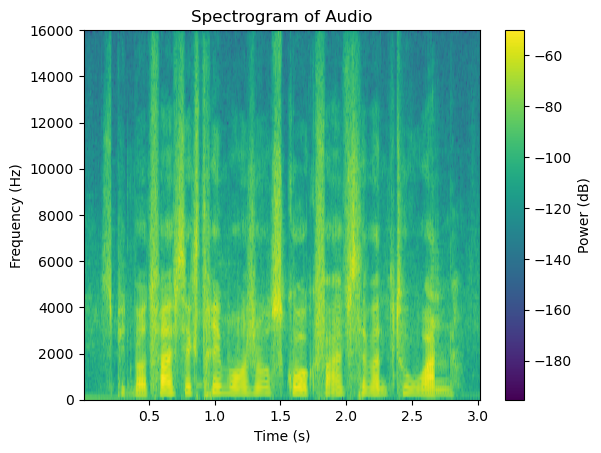

In [25]:
fig = plt.figure()
powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(aud, Fs=Fs, scale='dB')
plt.yscale('linear')

plt.title('Spectrogram of Audio')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar().set_label('Power (dB)')
plt.show()

In [26]:
fig.savefig('spectrogram.pdf', format='pdf', bbox_inches='tight')
fig.savefig('spectrogram.svg', format='svg', bbox_inches='tight')